In [1]:
from sklearn.decomposition import PCA
import numpy as np
import scipy
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# n = 50
# m = 100
# X = np.random.randn(m, n)
(X_mat, _), (_, _) = mnist.load_data()

In [3]:
print(X_mat.shape)
X = X_mat.reshape((X_mat.shape[0], -1))
print(X.shape)

(60000, 28, 28)
(60000, 784)


In [21]:
# n_comps = 512
n_comps = 256

In [18]:
pca = PCA(n_components=n_comps)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=256, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
np.sum( pca.explained_variance_ratio_ )

0.9789078831594882

In [20]:
X_tilde = pca.transform(X)
print(X_tilde.shape)

(60000, 256)


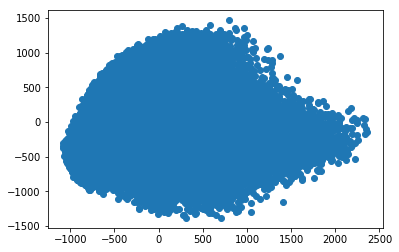

In [22]:
plt.scatter(X_tilde[:, 0], X_tilde[:, 1])
plt.show()

In [23]:
X_sk = pca.inverse_transform(X_tilde)
print(X_sk.shape)
X_sk_mat = X_sk.reshape((X_sk.shape[0], 28, 28))
print(X_sk_mat.shape)

(60000, 784)
(60000, 28, 28)


# From Scratch

In [24]:
#S = np.cov((X - np.mean(X, axis=0)).T)
X_m = X - np.mean(X, axis=0)
S = 1/X.size * (X_m).T @ (X_m)
#U, s, v = np.linalg.svd(S)
λ, U = np.linalg.eig(S)
#U, v = np.linalg.

print(U.shape)

(784, 784)


In [25]:
Uk = U[:, :n_comps]
print(Uk.shape)

(784, 256)


In [26]:
cod = X@Uk
print(cod.shape)

(60000, 256)


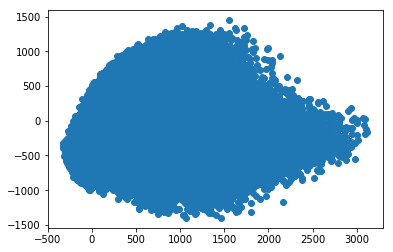

In [27]:
#plt.scatter(cod[:, 0], cod[:, 1]*-1)
plt.scatter(cod[:, 0]*-1, cod[:, 1])
plt.show()

In [28]:
X_aprox = cod@Uk.T
print(X_aprox.shape)
X_aprox_mat = X_aprox.reshape( (X_aprox.shape[0], 28, 28) )
print(X_aprox_mat.shape)

(60000, 784)
(60000, 28, 28)


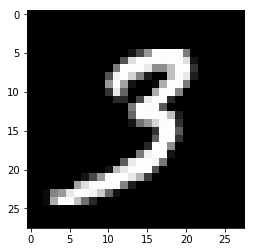

Reconstruido SK


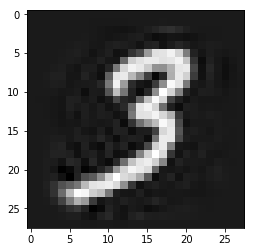

Reconstruido


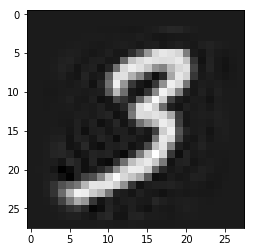

In [31]:
i = int(np.random.uniform(0, len(X_aprox)))
plt.imshow(X_mat[i], cmap='gray')
plt.show()
print('Reconstruido SK')
plt.imshow(X_sk_mat[i], cmap='gray')
plt.show()
print('Reconstruido')
plt.imshow(X_aprox_mat[i], cmap='gray')
plt.show()